# SVM classifier

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import collections
from src.utils import *
sns.set()

plt.rc('legend',fontsize=13)
plt.rc('axes',labelsize=15)
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Starcraft dataset

In [2]:
data_set_name = "starcraft"
#df, dd, ddi = boost("creditcard",
#                    max_depth_values=range(1, 5, 1),
#                    n_estimators_values=range(10, 200, 10),
#                    min_sample_split_values=range(2, 10, 2),
#                    trainning_sizes=[-1])
with open("stats/svm_" + data_set_name + "_dict.pikle", 'rb') as handle:
    dd = pickle.load(handle)
with open("stats/svm_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
    ddi = pickle.load(handle)

In [3]:
print(ddi)

{'c': 0, 'kernel': 1, 'train_limit': 2, 'score_type': 3}


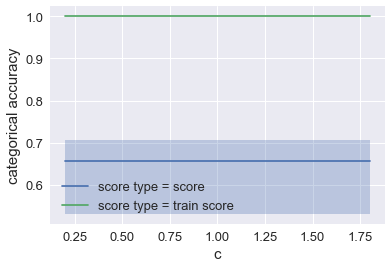

In [4]:
x_arg_name = 'c'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['kernel'], ['linear', 'poly'])]
                           )
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

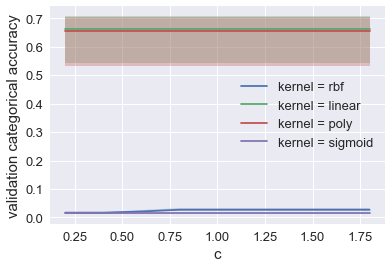

In [5]:
x_arg_name = 'c'
y_arg_name = 'score_type'
z_arg_name = 'kernel'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['score'])]
                           )
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

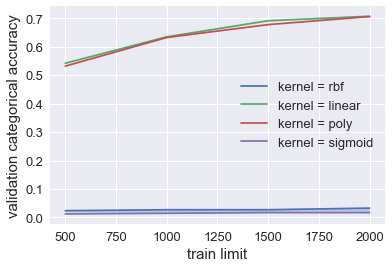

In [6]:
x_arg_name = 'train_limit'
y_arg_name = 'score_type'
z_arg_name = 'kernel'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['score'])]#[(ddi['kernel'], ['linear', 'poly'])]
                           )
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

    kernel score_type      mean    median       std       min       max
0      rbf      score  0.024635  0.026584  0.005393  0.014706  0.032805
1   linear      score  0.643665  0.662896  0.064648  0.541855  0.707014
2     poly      score  0.636878  0.654977  0.066160  0.531674  0.705882
3  sigmoid      score  0.015271  0.015837  0.001876  0.012443  0.016968
    kernel   score_type      mean    median       std    min    max
0      rbf  train_score  0.673026  1.000000  0.412965  0.019  1.000
1   linear  train_score  1.000000  1.000000  0.000000  1.000  1.000
2     poly  train_score  1.000000  1.000000  0.000000  1.000  1.000
3  sigmoid  train_score  0.020635  0.020769  0.001200  0.019  0.022


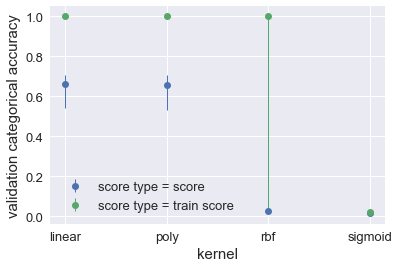

In [7]:
x_arg_name = 'kernel'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=None
                           )
plt.figure()
for a, d in cd.items():
    print(d)
    plt.errorbar(d.get(x_arg_name),d.get('median'), yerr=[d.get('median')-d.get('min'), d.get('max')-d.get('median')],
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '), fmt='o', elinewidth=1)
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    #plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

# Credit card dataset

In [8]:
data_set_name = "creditcard"
#df, dd, ddi = boost("creditcard",
#                    max_depth_values=range(1, 5, 1),
#                    n_estimators_values=range(10, 200, 10),
#                    min_sample_split_values=range(2, 10, 2),
#                    trainning_sizes=[-1])
with open("stats/svm_" + data_set_name + "_dict.pikle", 'rb') as handle:
    dd = pickle.load(handle)
with open("stats/svm_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
    ddi = pickle.load(handle)

In [9]:
print(ddi)

{'c': 0, 'kernel': 1, 'train_limit': 2, 'score_type': 3}


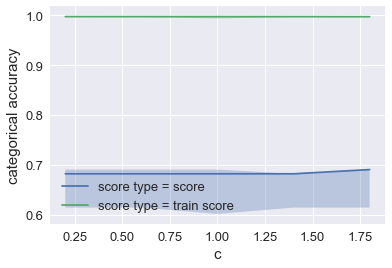

In [10]:
x_arg_name = 'c'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['kernel'], ['linear', 'poly'])]
                           )
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

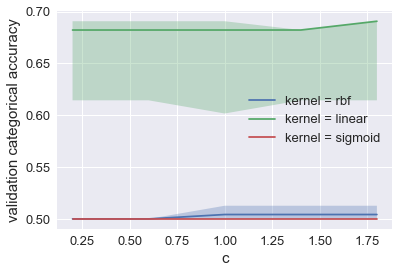

In [11]:
x_arg_name = 'c'
y_arg_name = 'score_type'
z_arg_name = 'kernel'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['score'])]
                           )
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

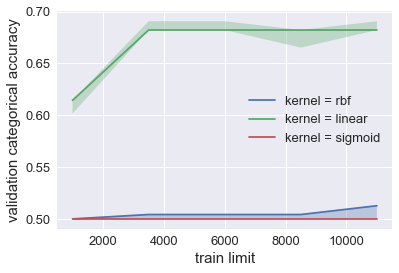

In [12]:
x_arg_name = 'train_limit'
y_arg_name = 'score_type'
z_arg_name = 'kernel'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['score'])]
                           )
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

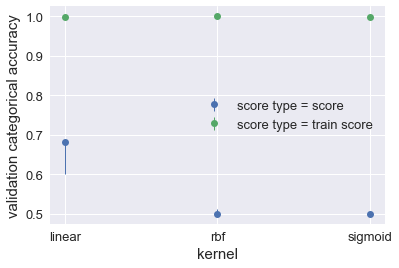

In [13]:
x_arg_name = 'kernel'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=None
                           )
plt.figure()
for a, d in cd.items():
    plt.errorbar(d.get(x_arg_name),d.get('median'), yerr=[d.get('median')-d.get('min'), d.get('max')-d.get('median')],
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '), fmt='o', elinewidth=1)
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    #plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()